##Layoffs Dataset:
Tech layoffs dataset from COVID 2019 to present. The data can be found here: https://www.kaggle.com/datasets/swaptr/layoffs-2022/data

In [ ]:
import csv
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.express as px

The dataset contains layoffs from all over the world, first lets visualize the total layoffs by year.
#### Line Chart

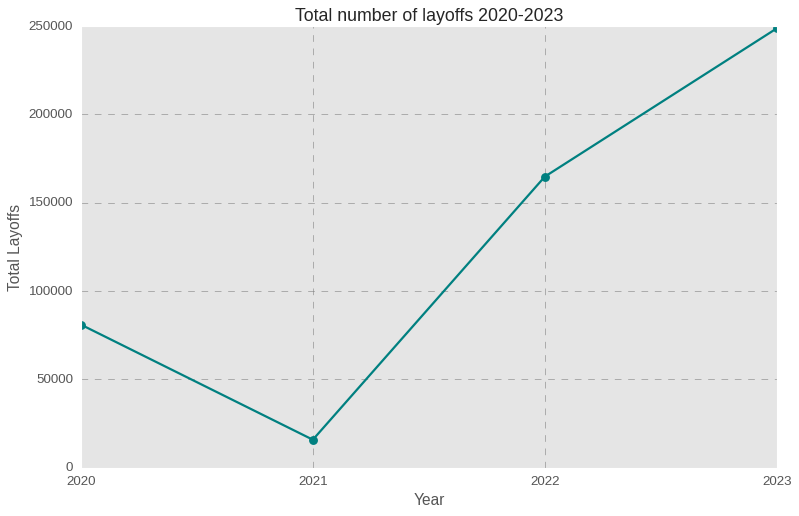

In [ ]:
filename = '/content/Layoffs Dataset.csv'
with open(filename) as f:
    reader = csv.reader(f)
    header_row = next(reader) #skip header

    yearly_layoffs = {} # Initialize a dict to store yearly layoffs data
    for row in reader:
        try:
            year = datetime.strptime(row[5], '%Y-%m-%d').year #extract year
            try:
                laidoff = int(row[3])
            except ValueError: #Skipping the missing data or data thats not int
                continue
            if year in yearly_layoffs: # Adding laidoff count to corresponding year
                yearly_layoffs[year] += laidoff
            else:
                yearly_layoffs[year] = laidoff
        except ValueError:
            continue #skipping missing rows

years = list(yearly_layoffs.keys())
layoffs = list(yearly_layoffs.values())

plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(years, layoffs, color='teal', marker='o', linestyle='-', linewidth=2, markersize=8)
plt.title("Total number of layoffs 2020-2023", fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel("Total Layoffs", fontsize=14)
ax.set_xticks(years)
ax.set_xticklabels([str(year) for year in years])
plt.tick_params(axis='both', which='major', labelsize=12) #for better readability
plt.grid(True,linestyle='--', linewidth=0.5, color='gray')
plt.show()

In [ ]:

country_counts = {}

with open(filename) as file:
    reader = csv.reader(file)
    header = next(reader)

    for row in reader:
        country = row[7]
        if country in country_counts:
            country_counts[country] += 1  # Increment count for the country
        else:
            country_counts[country] = 1  # Initialize count for new country

# Sort countries by the number of layoffs
sorted_countries = sorted(country_counts.items(), key=lambda x: x[1], reverse=True)

for country, count in sorted_countries:
    print(f"{country}: {count} layoffs")

United States: 2032 layoffs
India: 225 layoffs
Canada: 128 layoffs
United Kingdom: 106 layoffs
Germany: 90 layoffs
Brazil: 85 layoffs
Australia: 71 layoffs
Israel: 69 layoffs
Singapore: 43 layoffs
Indonesia: 35 layoffs
Sweden: 26 layoffs
China: 23 layoffs
Nigeria: 21 layoffs
Netherlands: 18 layoffs
France: 14 layoffs
Kenya: 12 layoffs
New Zealand: 10 layoffs
Estonia: 8 layoffs
Ireland: 8 layoffs
Finland: 6 layoffs
Switzerland: 6 layoffs
Hong Kong: 6 layoffs
Norway: 6 layoffs
Spain: 6 layoffs
Mexico: 6 layoffs
Argentina: 6 layoffs
United Arab Emirates: 6 layoffs
Poland: 5 layoffs
Chile: 5 layoffs
Austria: 5 layoffs
Colombia: 5 layoffs
Luxembourg: 4 layoffs
Seychelles: 4 layoffs
Denmark: 4 layoffs
South Korea: 3 layoffs
Portugal: 3 layoffs
Malaysia: 3 layoffs
Vietnam: 3 layoffs
Pakistan: 3 layoffs
Ghana: 2 layoffs
Czech Republic: 2 layoffs
Romania: 2 layoffs
Japan: 2 layoffs
Egypt: 2 layoffs
Cayman Islands: 1 layoffs
Saudi Arabia: 1 layoffs
Philippines: 1 layoffs
Ukraine: 1 layoffs
Italy

The above code calculated the total layoffs (consider %) for each country and printed them in order from highest to lowest. We can see United States, India, Canada are top 3. So I wanted to look into different cities in United States and calculate the values of the total layoffs.

It's important to note that these numbers don't necessarily reflect the exact headcount affected. Instead, they should be viewed in conjunction with the 'percentage_laid_off' column, which gives the proportion of the workforce that was laid off. This percentage is critical as it provides context to the raw numbers.

#### Pie Chart

In [ ]:
location_layoffs = {}
with open(filename) as file:
    reader = csv.reader(file)
    header = next(reader)

    for row in reader:
      if row[7] == 'United States':  # Check for US only
        location = row[1]  # Get location within US

        if location not in location_layoffs:
            location_layoffs[location] = 0 #initiaze if location not is in the dict
        try:
            layoffs = int(row[3])  # layoffs for that location
            location_layoffs[location] += layoffs
        except ValueError:
            continue  # Skip rows with invalid data

# To select the top 7, sort the location with high layoffs
sorted_locations = sorted(location_layoffs.items(), key=lambda x: x[1], reverse=True)[:7]
locations = []
layoffs = []
for location, layoff in sorted_locations:
    locations.append(location)
    layoffs.append(layoff)

# calculate the total layoffs and percentages
total_layoffs = sum(layoffs)
percentages = [(layoff / total_layoffs) * 100 for layoff in layoffs]

# Plot pie chart using Plotly Express
fig = px.pie(names=locations,
             values=layoffs,
             title='Top 7 Locations in the United States with the Highest Layoffs',
             color_discrete_sequence=px.colors.sequential.Teal)
fig.show()

In [ ]:
px.colors.named_colorscales()

['aggrnyl',
 'agsunset',
 'blackbody',
 'bluered',
 'blues',
 'blugrn',
 'bluyl',
 'brwnyl',
 'bugn',
 'bupu',
 'burg',
 'burgyl',
 'cividis',
 'darkmint',
 'electric',
 'emrld',
 'gnbu',
 'greens',
 'greys',
 'hot',
 'inferno',
 'jet',
 'magenta',
 'magma',
 'mint',
 'orrd',
 'oranges',
 'oryel',
 'peach',
 'pinkyl',
 'plasma',
 'plotly3',
 'pubu',
 'pubugn',
 'purd',
 'purp',
 'purples',
 'purpor',
 'rainbow',
 'rdbu',
 'rdpu',
 'redor',
 'reds',
 'sunset',
 'sunsetdark',
 'teal',
 'tealgrn',
 'turbo',
 'viridis',
 'ylgn',
 'ylgnbu',
 'ylorbr',
 'ylorrd',
 'algae',
 'amp',
 'deep',
 'dense',
 'gray',
 'haline',
 'ice',
 'matter',
 'solar',
 'speed',
 'tempo',
 'thermal',
 'turbid',
 'armyrose',
 'brbg',
 'earth',
 'fall',
 'geyser',
 'prgn',
 'piyg',
 'picnic',
 'portland',
 'puor',
 'rdgy',
 'rdylbu',
 'rdylgn',
 'spectral',
 'tealrose',
 'temps',
 'tropic',
 'balance',
 'curl',
 'delta',
 'oxy',
 'edge',
 'hsv',
 'icefire',
 'phase',
 'twilight',
 'mrybm',
 'mygbm']